In [1]:
import PyQt5
%matplotlib qt
import math
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
print("setup done")

setup done


In [2]:
df = pd.read_csv('./dataset/dataset_brazil.csv')
df['Date']= pd.to_datetime(df['Date'])
print("dataset Loaded")

dataset Loaded


# Checking our Dataset

In [3]:
df.head()

Unnamed: 0  Company Code  Order Number           Product Product Category  \
0           0       1757000        137398  Special Gasoline             Fuel   
1           1       1757000        137410  Special Gasoline             Fuel   
2           2       1757000        137413  Special Gasoline             Fuel   
3           3       1757000        137414  Special Gasoline             Fuel   
4           4       1757000        137414  Special Gasoline             Fuel   

          Client Client City  Product Cost  Discount Amount  Amount   Total  \
0  Barry Barrett      Ruwell          2.83              0.0   4.430   15.01   
1  Barry Barrett      Ruwell          2.83              0.0   8.862   30.03   
2  Barry Barrett      Ruwell          2.83              0.0  29.508  100.00   
3  Barry Barrett      Ruwell          2.83              0.0  14.754   50.00   
4  Barry Barrett      Ruwell          2.83              0.0  14.760   50.02   

  Form of payment                Date     ProductId  Rating  
0           Money 2017-06-10 15:07:00  116945202798     7.5  
1           Money 2017-06-10 15:17:00  116945202798     7.5  
2           Money 2017-06-10 15:21:00  116945202798     7.5  
3           Money 2017-06-10 15:22:00  116945202798     7.5  
4           Money 2017-06-10 15:22:00  116945202798     7.5

# Creating a dataframe for RFM scores

In [4]:
dfclient = pd.DataFrame(df['Client'].unique())
dfclient.columns = ['Client']

# Recency
df_max_purchase = df.groupby('Client').Date.max().reset_index()
df_max_purchase.columns = ['Client','MaxPurchaseDate']
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max()+pd.DateOffset(1) - df_max_purchase['MaxPurchaseDate']).dt.days   
dfclient = pd.merge(dfclient, df_max_purchase[['Client','Recency']], on='Client')


# Frequency
dffreq = df.groupby('Client')['Order Number'].nunique().reset_index()
dffreq.columns = ['Client','Frequency']
dfclient = pd.merge(dfclient, dffreq, on='Client')


#Monetary
#calculate revenue for each customer
dfrev = df.groupby('Client').Total.sum().reset_index()
dfrev.columns = ['Client','Monetary']
dfclient = pd.merge(dfclient, dfrev[['Client','Monetary']], on='Client')

# Create a backup
dfclient_bk = dfclient.copy() 

In [5]:
dfclient.head()

Client  Recency  Frequency      Monetary
0  Barry Barrett        9     113604  1.553030e+07
1    Penny Burns       81      80986  8.398855e+06
2   Arthur Mason        1      34652  1.335526e+07
3  April Herrera        5        844  1.515046e+05
4   Sonia Mendez        1      17039  1.869099e+06

After creating RFM features we scale them and covert them into interpretable scores

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scale = MinMaxScaler()
dfclient[['Recency','Frequency','Monetary']] = scale.fit_transform(dfclient[['Recency','Frequency','Monetary']])

In [7]:
# Create ranks
dfclient['Rank_Recency'] = pd.qcut( dfclient['Recency'].rank(method='first'),q=2000, labels = range(2001, 1, -1),)
dfclient['Rank_Recency'] = pd.to_numeric(dfclient['Rank_Recency'])

dfclient['Rank_Frequency'] = pd.qcut( dfclient['Frequency'].rank(method='first'),q=2000, labels = range(1, 2001, 1))
dfclient['Rank_Frequency'] = pd.to_numeric(dfclient['Rank_Frequency'])

dfclient['Rank_Monetary'] = pd.qcut( dfclient['Monetary'].rank(method='first'),q=2000, labels = range(1, 2001, 1))
dfclient['Rank_Monetary'] = pd.to_numeric(dfclient['Rank_Monetary'])

## Plot  graphs for all corresponding featurers

In [8]:
%matplotlib inline
sns.scatterplot(data=dfclient[['Rank_Monetary','Rank_Frequency']], x="Rank_Monetary", y="Rank_Frequency",marker='x')

<AxesSubplot:xlabel='Rank_Monetary', ylabel='Rank_Frequency'>

In [9]:
%matplotlib inline
sns.scatterplot(data=dfclient[['Rank_Recency','Rank_Frequency']], x="Rank_Recency", y="Rank_Frequency",marker='x')

<AxesSubplot:xlabel='Rank_Recency', ylabel='Rank_Frequency'>

<AxesSubplot:xlabel='Rank_Recency', ylabel='Rank_Monetary'>

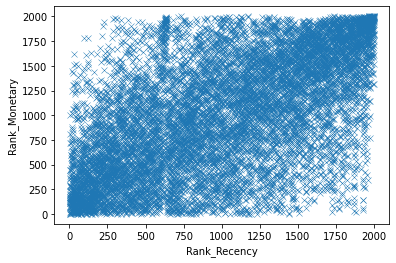

In [10]:
%matplotlib inline
sns.scatterplot(data=dfclient[['Rank_Recency','Rank_Monetary']], x="Rank_Recency", y="Rank_Monetary",marker='x')

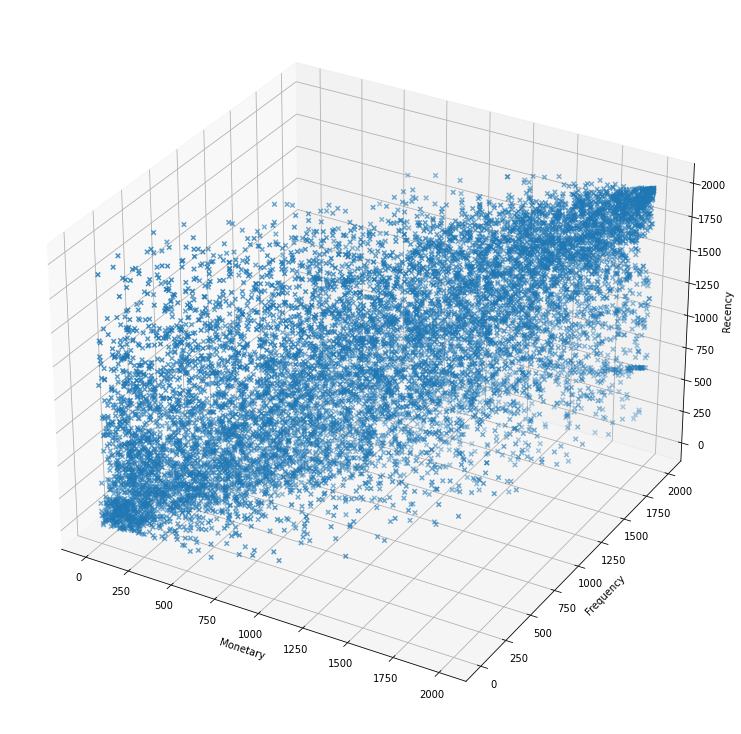

In [11]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111,projection='3d')
# fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(dfclient['Rank_Monetary'],dfclient['Rank_Frequency'],dfclient['Rank_Recency'],cmap='brg',
           marker='x')
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()


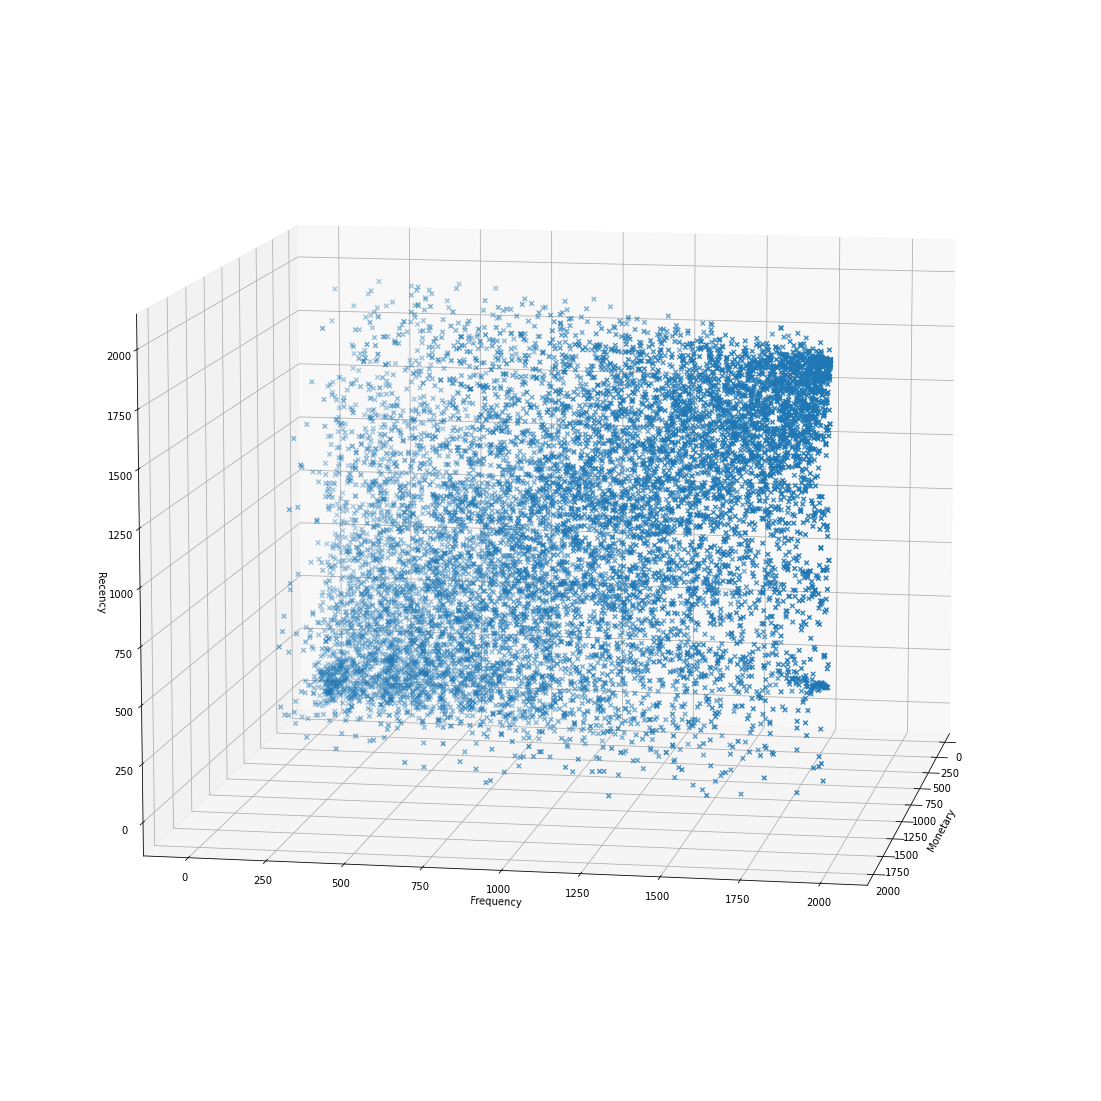

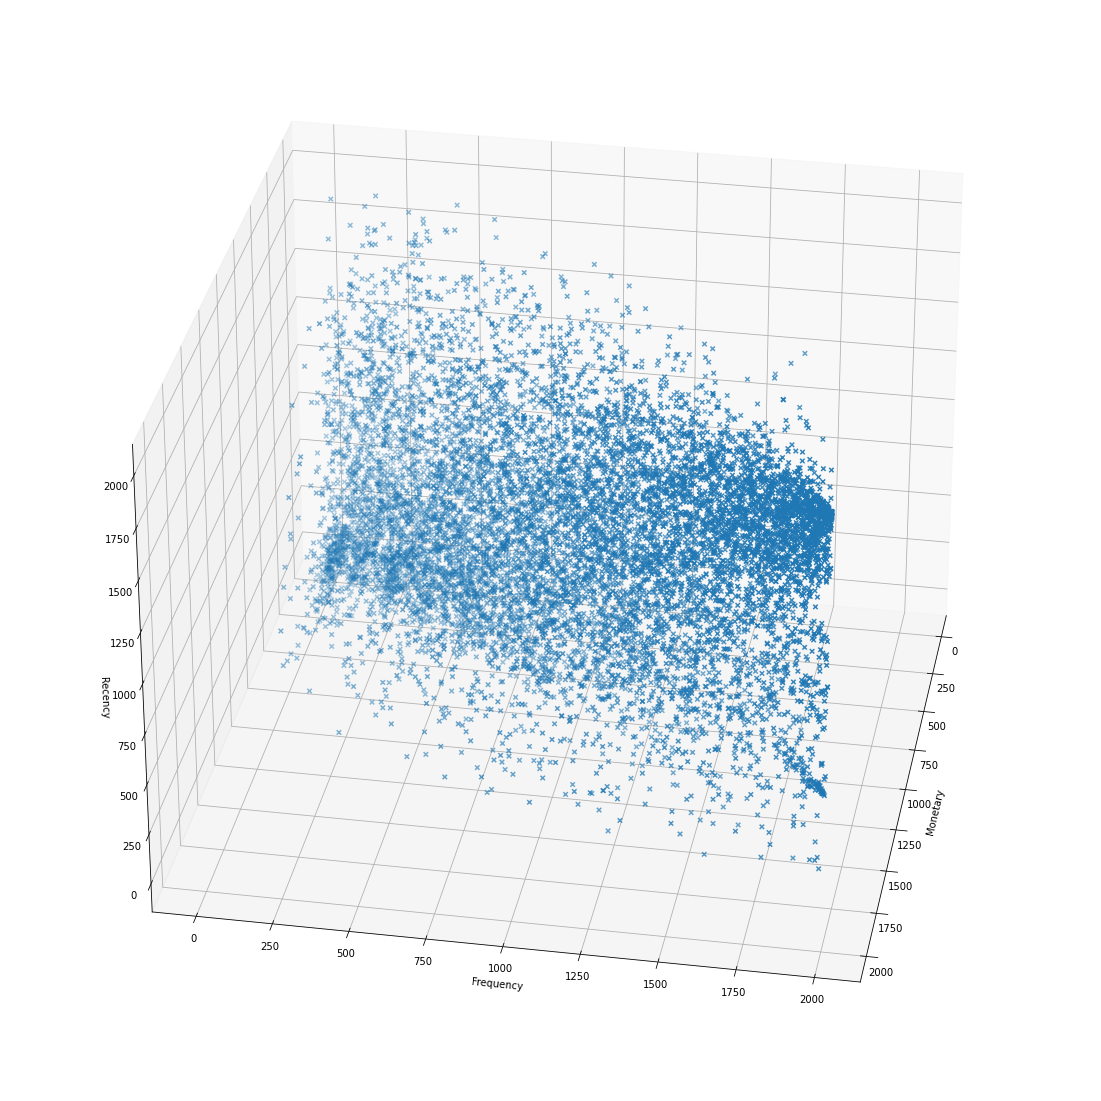

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(dfclient['Rank_Monetary'],dfclient['Rank_Frequency'],dfclient['Rank_Recency'],cmap='brg',
           marker='x')
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.view_init(10, 10)
plt.show()

fig2 = plt.figure(figsize=(20,20))
ax = fig2.add_subplot(111,projection='3d')
ax.scatter(dfclient['Rank_Monetary'],dfclient['Rank_Frequency'],dfclient['Rank_Recency'],cmap='brg',
           marker='x')
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.view_init(30, 10)
plt.show()

fig3 = plt.figure(figsize=(20,20))
ax = fig3.add_subplot(111,projection='3d')
ax.scatter(dfclient['Rank_Monetary'],dfclient['Rank_Frequency'],dfclient['Rank_Recency'],cmap='brg',
           marker='x')
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.view_init(10, 45)
plt.show()

In [13]:
sns.heatmap(dfclient.corr())

<AxesSubplot:>

In [14]:
%matplotlib inline

inertia_err = []
for k in range(0,20):
    kmeans = KMeans(n_clusters=k+1, random_state = 42).fit(dfclient[['Rank_Frequency',
                                                                     'Rank_Recency',
                                                                    'Rank_Monetary']])
    inertia_err.append(kmeans.inertia_)
    
sns.pointplot(x=list(range(1,21)), y= inertia_err)
plt.show()

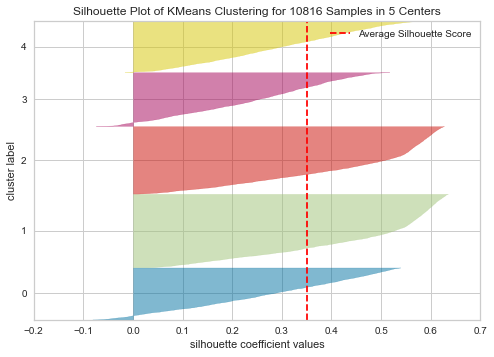

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 10816 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5 ,random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(dfclient[['Rank_Monetary','Rank_Frequency','Rank_Recency']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [16]:
# we deice to go for 5 clusters
from sklearn.cluster import KMeans
fin_clusters = 5

model = KMeans(n_clusters=fin_clusters, random_state = 42).fit(dfclient[['Rank_Frequency',
                                                                     'Rank_Recency',
                                                                    'Rank_Monetary']])
centers = model.cluster_centers_

c=model.predict(dfclient[['Rank_Frequency','Rank_Recency',
                                        'Rank_Monetary']])
dfclient['Cluster'] = c

In [17]:
from sklearn.metrics import silhouette_score

silhouette_score(dfclient[['Rank_Frequency','Rank_Recency','Rank_Monetary']], dfclient['Cluster'])

0.3504747766675332

## Fuzzy C-means

To run this part you need Fuzzy Cmeans library
You can comment out the code in the cell below to run the code if you dont want to insatll

In [18]:
# we deice to go for 5 clusters
# from sklearn.cluster import KMeans
from fcmeans import FCM
fin_clusters = 5

fcm = FCM(n_clusters=fin_clusters, random_state = 42)

fcm.fit(dfclient[['Rank_Frequency','Rank_Recency','Rank_Monetary']])
centers = fcm.centers



c=fcm.predict(dfclient[['Rank_Frequency','Rank_Recency',
                                        'Rank_Monetary']])
dfclient['ClusterFCM'] = c

silhouette_score(dfclient[['Rank_Frequency','Rank_Recency','Rank_Monetary']], dfclient['ClusterFCM'])

0.34096512670299345

## we see than K-means performed better than Fuzzy C-means

### Plotting graphs for clusters

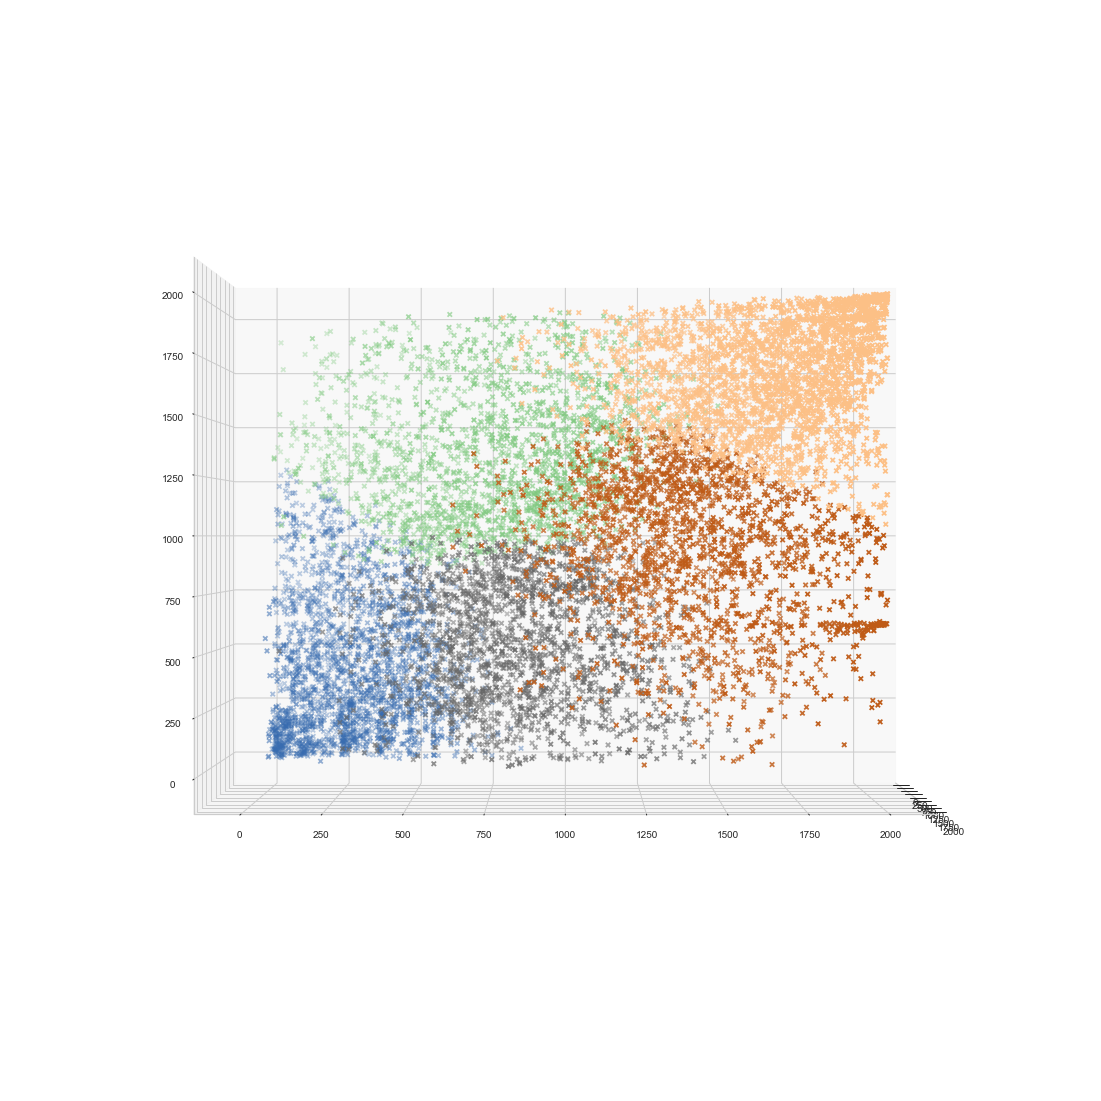

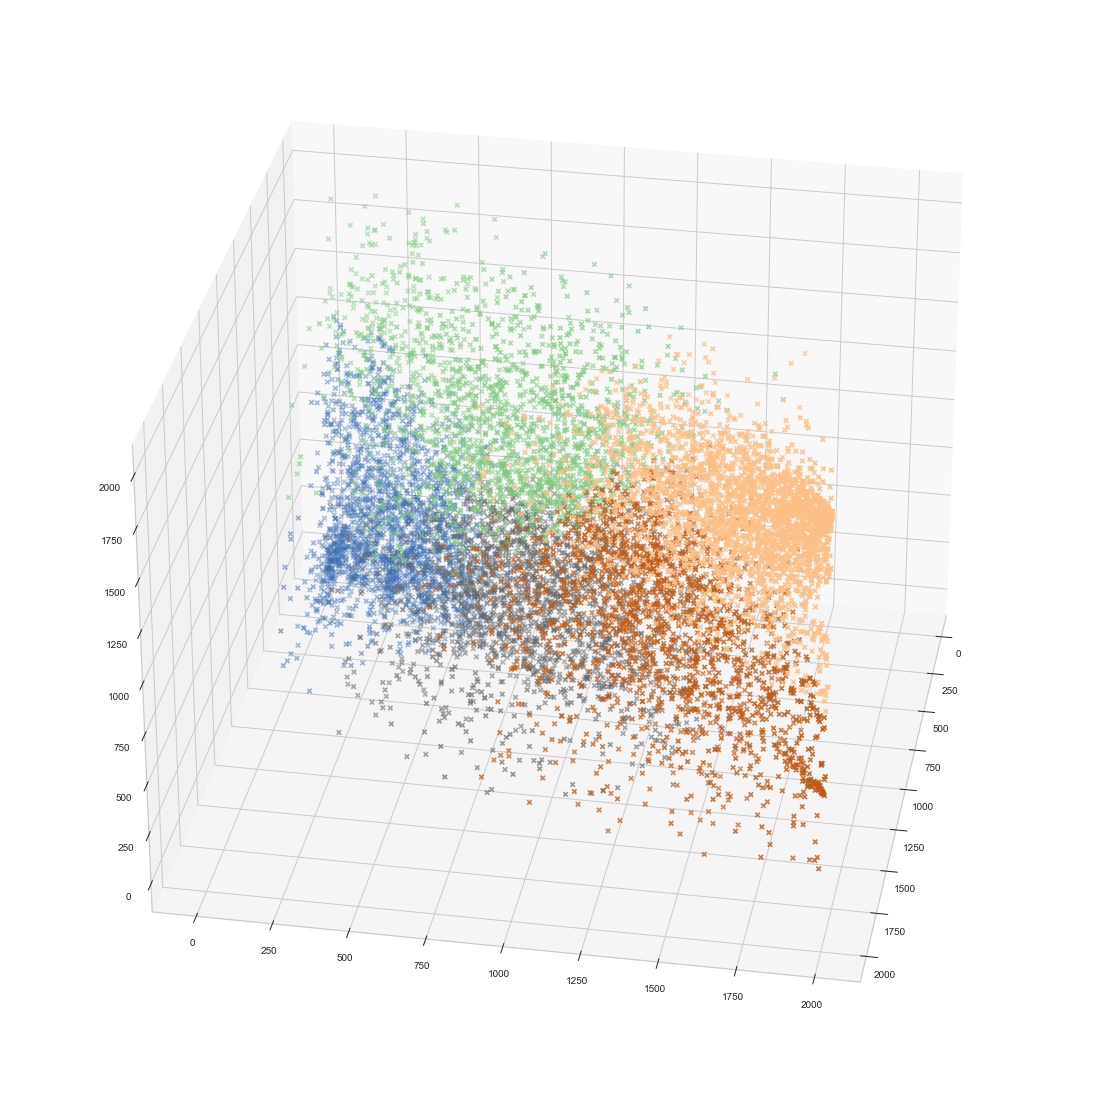

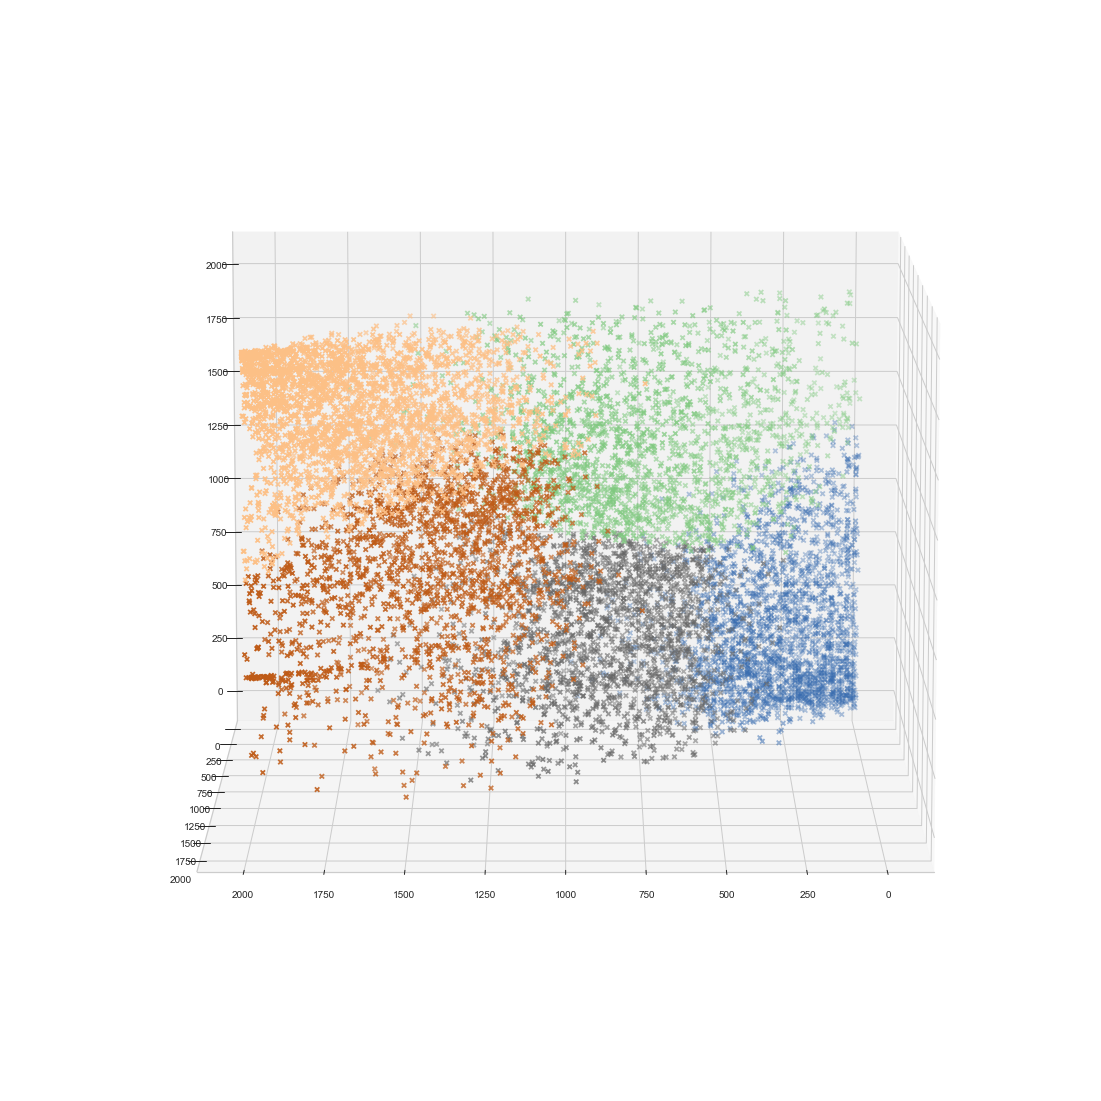

In [19]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(dfclient['Rank_Monetary'],dfclient['Rank_Frequency'],dfclient['Rank_Recency'],cmap='Accent',
           marker='x',c=dfclient['Cluster'])
ax.view_init(0, 0)
plt.show()

fig1 = plt.figure(figsize=(20,20))
ax = fig1.add_subplot(111,projection='3d')
ax.scatter(dfclient['Rank_Monetary'],dfclient['Rank_Frequency'],dfclient['Rank_Recency'],cmap='Accent',
           marker='x',c=dfclient['Cluster'])
ax.view_init(30, 10)
plt.show()

fig2 = plt.figure(figsize=(20,20))
ax = fig2.add_subplot(111,projection='3d')
ax.scatter(dfclient['Rank_Monetary'],dfclient['Rank_Frequency'],dfclient['Rank_Recency'],cmap='Accent',
           marker='x',c=dfclient['Cluster'])
ax.view_init(10, 90)
plt.show()

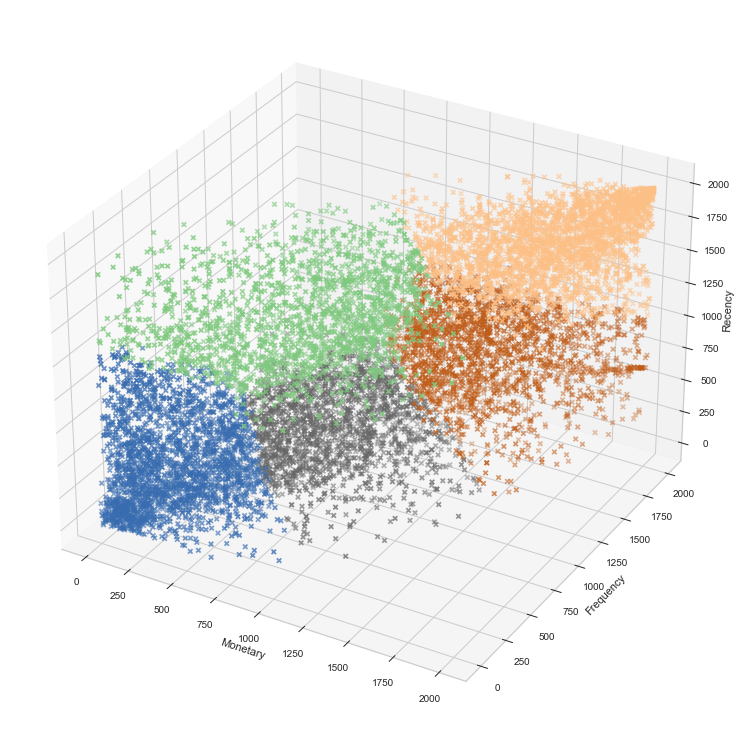

In [20]:
from sklearn.cluster import KMeans
%matplotlib inline
fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111,projection='3d')
# fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(dfclient['Rank_Monetary'],dfclient['Rank_Frequency'],dfclient['Rank_Recency'],cmap='Accent',
           marker='x',c=dfclient['Cluster'])
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()


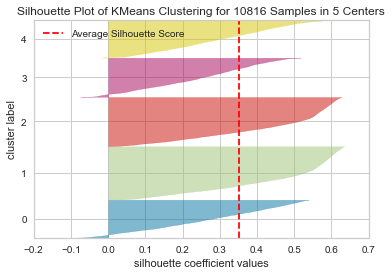

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 10816 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=fin_clusters ,random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(dfclient[['Rank_Monetary','Rank_Frequency','Rank_Recency']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [22]:
dfclient

Client   Recency  Frequency  Monetary  Rank_Recency  \
0        Barry Barrett  0.007286   1.000000  1.000000          1736   
1          Penny Burns  0.072860   0.712877  0.540804          1170   
2         Arthur Mason  0.000000   0.305018  0.859949          2001   
3        April Herrera  0.003643   0.007421  0.009755          1792   
4         Sonia Mendez  0.000000   0.149978  0.120352          2001   
...                ...       ...        ...       ...           ...   
10811     Dwight Terry  0.609290   0.000000  0.000032           298   
10812  Natalie Barnett  0.318761   0.000000  0.000010           802   
10813  Judy Strickland  0.841530   0.000000  0.000004            40   
10814      Julius Wood  0.224954   0.000000  0.000006           914   
10815        Hugo Love  0.020036   0.000000  0.000010          1469   

       Rank_Frequency  Rank_Monetary  Cluster  ClusterFCM  
0                2000           2000        1           4  
1                2000           2000        1           4  
2                2000           2000        1           4  
3                1971           1955        1           4  
4                2000           1999        1           4  
...               ...            ...      ...         ...  
10811             241            427        2           0  
10812             242            153        2           0  
10813             242             54        2           0  
10814             242             96        2           3  
10815             242            166        0           3  

[10816 rows x 9 columns]

d:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


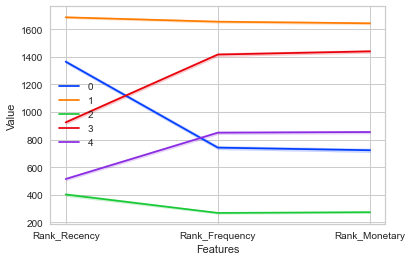

In [23]:
%matplotlib inline
dfclient['Cluster_lab'] = model.labels_
dfclient['Client_id'] = dfclient.index

melted_rfm = pd.melt(dfclient.reset_index(),
                    id_vars = ['Client_id','Cluster_lab'],
                    value_vars=['Rank_Recency','Rank_Frequency','Rank_Monetary'],
                    var_name='Features',
                    value_name='Value')
sns.color_palette("hls", 8)
ax = sns.lineplot('Features','Value',hue='Cluster_lab',data=melted_rfm,
                  palette=sns.color_palette("bright", len(melted_rfm['Cluster_lab'].unique())))
plt.legend()

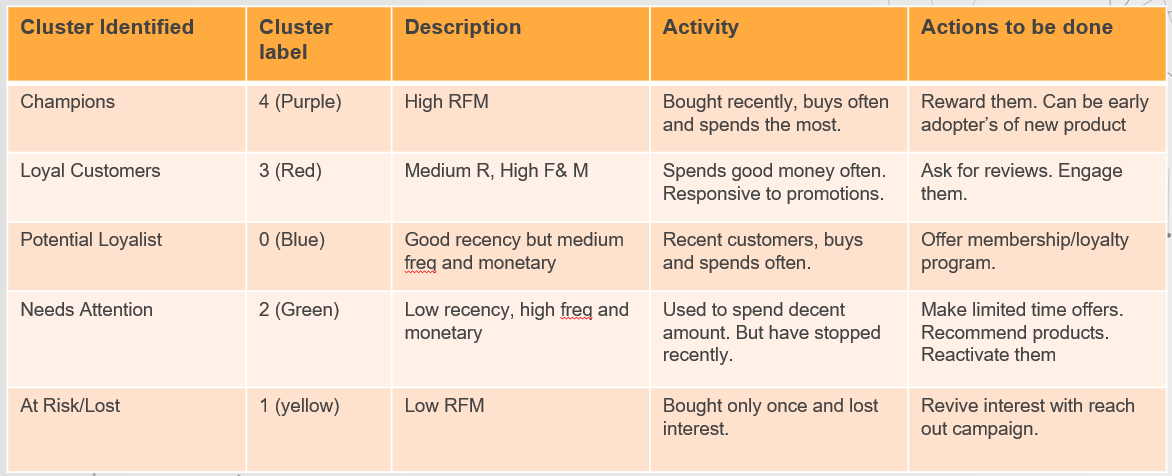

## Plotting graphs For different Segements

In [24]:
def client_segment(x):
    if x == 4:
        return 'Champions'
    elif  x == 3:
        return 'Loyal Customers'
    elif  x == 0:
        return 'Potential Loyalist'
    elif  x >= 2:
        return 'Needs Attention'
    elif  x >= 1:
        return 'At Risk/Almost Lost'
    else:
        return 'Lost'

In [25]:
x = dfclient['Cluster'].apply(client_segment)
dfclient['Segment']=x

In [26]:
segments = dfclient[['Segment','Recency','Frequency','Monetary', 'Rank_Frequency', 'Rank_Monetary', 'Rank_Recency']].groupby('Segment').median()
segments.reset_index(inplace = True)

Text(0.5, 1.0, 'Median Visits (Frequency)')

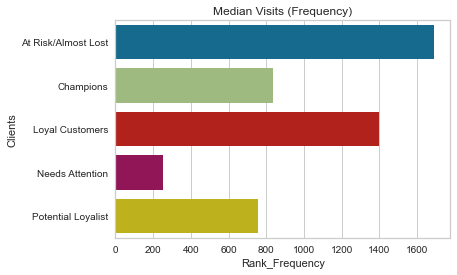

In [27]:
ax = sns.barplot(x="Rank_Frequency", y="Segment", data=segments)
ax.set_ylabel('Clients')
ax.set_title('Median Visits (Frequency)')

Text(0.5, 1.0, 'Median Expenditure')

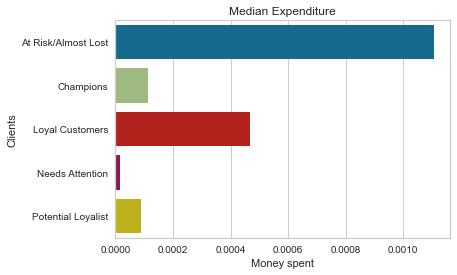

In [28]:
ax = sns.barplot(x="Monetary", y="Segment", data=segments)
ax.set_ylabel('Clients')
ax.set_xlabel('Money spent')
ax.set_title('Median Expenditure')


Text(0.5, 1.0, 'Median time from last shop ')

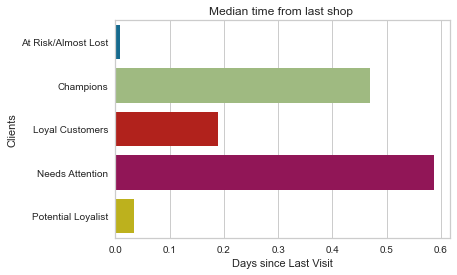

In [29]:
ax = sns.barplot(x="Recency", y="Segment", data=segments)
ax.set_ylabel('Clients')
ax.set_xlabel('Days since Last Visit')
ax.set_title('Median time from last shop ')

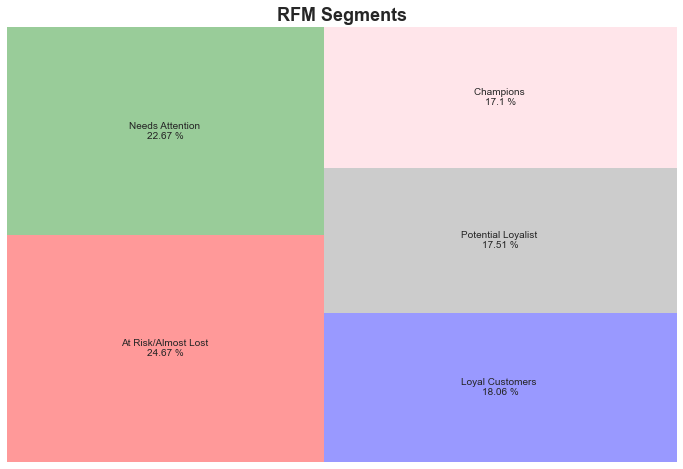

In [30]:
import squarify

squarity =dfclient['Segment'] .value_counts()
# color=['purple', 'brown', 'blue', 'green', 'red']
color=["red","green","blue", "grey",'pink']
seg = list(squarity.index)
perc_list = list(  (dfclient['Segment'].value_counts(normalize=True)*100).values  )
perc_list = [str(round(num,2))+' %' for num in perc_list]
labels = []

for i in range(len(seg)):
    t = seg[i]+' \n'+perc_list[i]
    labels.append(t)


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes= squarity , 
              label=labels ,color = color, alpha=0.4,)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()